In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load datasets 
red_wine = pd.read_csv("F:\DataSciCAB\DataSci\wine\WineDataset\winequality-red.csv", sep=";")


In [4]:
#rename columns in red wine ds
for col in red_wine.columns:
    red_wine.rename(columns={col:col.lower().replace(" ","_")},inplace=True)
red_wine.head(0)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality


In [5]:
#removed datas

#so i have decided to remove all the wine samples with higher level of total sulfur dioxide 
red_wine.drop(red_wine[red_wine['total_sulfur_dioxide']>=160].index, inplace=True)


Feature Selection using correlations 

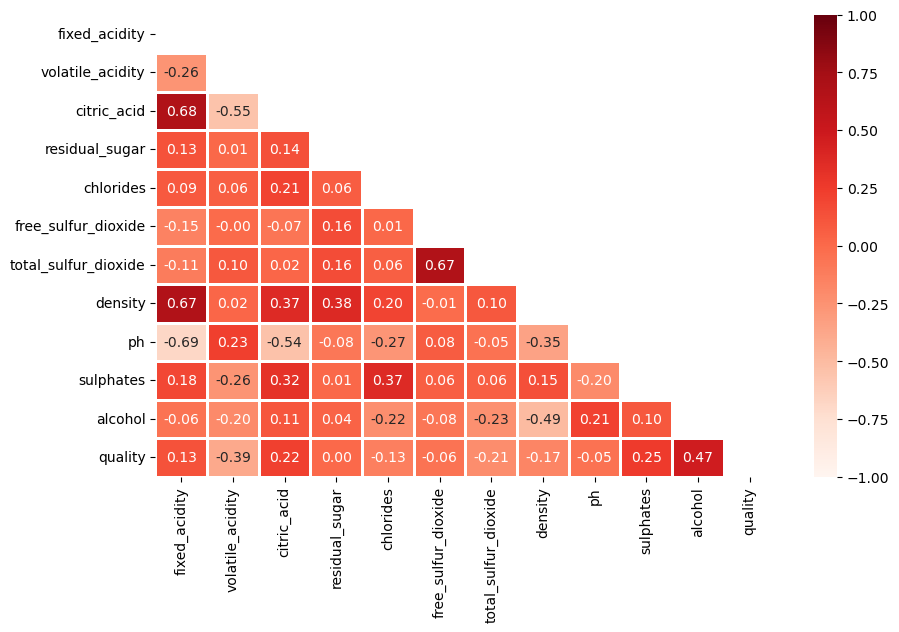

In [6]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(10,6))
# Create the correlation matrix
corr_matrix = red_wine.corr()

# Create a mask to hide the upper triangle of the matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with the mask applied
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=2, mask=mask, cmap="Reds", vmax= 1, vmin=-1)
plt.show()



In [7]:
for a in range(len(red_wine.corr().columns)):
    for b in range(a):
        if abs(red_wine.corr().iloc[a,b]) >0.6:
            name = red_wine.corr().columns[a]
            print(name)

citric_acid
total_sulfur_dioxide
density
ph


In [8]:
#since total sulfur dioxide, citric acid, density and ph have high correlation, so we remove them.
red_wine=red_wine.drop('total_sulfur_dioxide',axis=1)
red_wine=red_wine.drop('citric_acid',axis=1)
red_wine=red_wine.drop('density',axis=1)
red_wine=red_wine.drop('ph',axis=1)

In [9]:
red_wine.head(0)

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,sulphates,alcohol,quality


Encodeding categorical values

In [10]:
red_wine['label'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <=6 else 'high')
red_wine.head()
red_wine["label"].value_counts()

low       744
medium    636
high      215
Name: label, dtype: int64

In [11]:
red_wine['quality_label'] = red_wine.label.map({"low" : "0", "medium" : "1", "high" : "2"}).astype('int')
red_wine = red_wine.drop(columns=["label", "quality"]) 

red_wine.head(1)

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,sulphates,alcohol,quality_label
0,7.4,0.7,1.9,0.076,11.0,0.56,9.4,0


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# define the features and target variable
X = red_wine.drop(['quality_label'], axis=1)
y = red_wine['quality_label']

# normalize the features
norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

1 ***Logistic Regresion Model 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

lr = LogisticRegression()

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model on the entire training data
lr.fit(X_train, y_train)

# Make predictions on the test data
predictions = lr.predict(X_test)

print('**** Logistic Regression Model****')

# Check the accuracy of the model
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test, predictions))

# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))



print("Confusion matrix: here")
cm = confusion_matrix(y_test, predictions, labels=lr.classes_)
a = pd.DataFrame(cm, index=lr.classes_, columns=lr.classes_)
display(a)

Cross-validation scores: [0.546875   0.59607843 0.63921569 0.61960784 0.63137255]
Mean cross-validation score: 0.6066299019607844
**** Logistic Regression Model****
Accuracy score: 0.6332288401253918
Cohen-Kappa score: 0.35658874637980975
Confusion matrix:


,low,medium,high
low,125,23,2
medium,53,71,5
high,1,33,6


Classification Report
              precision    recall  f1-score   support

         low       0.70      0.83      0.76       150
      medium       0.56      0.55      0.55       129
        high       0.46      0.15      0.23        40

    accuracy                           0.63       319
   macro avg       0.57      0.51      0.51       319
weighted avg       0.61      0.63      0.61       319

Confusion matrix: here


,0,1,2
0,125,23,2
1,53,71,5
2,1,33,6


2 ***Decision Tree Model 

In [14]:

from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier()

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(dtc, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
predictions = dtc.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
print('**** Decision Tree Model****')
print("Accuracy:", accuracy)

# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))

Cross-validation scores: [0.58984375 0.65490196 0.64705882 0.68627451 0.65882353]
Mean cross-validation score: 0.6473805147058823
**** Decision Tree Model****
Accuracy: 0.5893416927899686
Cohen-Kappa score: 0.316570176299349
Confusion matrix:


,low,medium,high
low,98,44,8
medium,39,74,16
high,7,17,16


Classification Report
              precision    recall  f1-score   support

         low       0.68      0.65      0.67       150
      medium       0.55      0.57      0.56       129
        high       0.40      0.40      0.40        40

    accuracy                           0.59       319
   macro avg       0.54      0.54      0.54       319
weighted avg       0.59      0.59      0.59       319



3 ***Random Forest Model

In [15]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
predictions = rfc.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
#print('**** Random Forest Model****')
print("Accuracy:", accuracy)

# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
#print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))

Cross-validation scores: [0.6640625  0.73333333 0.72156863 0.74509804 0.71764706]
Mean cross-validation score: 0.716341911764706
Accuracy: 0.6959247648902821
Confusion matrix:


,low,medium,high
low,119,28,3
medium,34,84,11
high,0,21,19


Classification Report
              precision    recall  f1-score   support

         low       0.78      0.79      0.79       150
      medium       0.63      0.65      0.64       129
        high       0.58      0.47      0.52        40

    accuracy                           0.70       319
   macro avg       0.66      0.64      0.65       319
weighted avg       0.69      0.70      0.69       319



4 ***Naive Bayes Model 

In [39]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(gnb, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the classifier to the training data
gnb.fit(X_train, y_train)

# Use the classifier to predict the wine type on the test data
predictions = gnb.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)

print('**** Naive Bayes Model ****')
print("Accuracy:", accuracy)

# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))

Cross-validation scores: [0.58984375 0.60784314 0.57647059 0.62352941 0.64313725]
Mean cross-validation score: 0.6081648284313725
**** Naive Bayes Model ****
Accuracy: 0.6238244514106583
Cohen-Kappa score: 0.3793673697692893
Confusion matrix:


,low,medium,high
low,113,33,4
medium,47,61,21
high,1,14,25


Classification Report
              precision    recall  f1-score   support

         low       0.70      0.75      0.73       150
      medium       0.56      0.47      0.51       129
        high       0.50      0.62      0.56        40

    accuracy                           0.62       319
   macro avg       0.59      0.62      0.60       319
weighted avg       0.62      0.62      0.62       319



5 ***Support Vector Model 

In [40]:

from sklearn.svm import SVC



svc = SVC(kernel='rbf')

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(svc, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Use the classifier to predict the wine type on the test data
predictions = svc.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)

print('**** SVC Model ****')
print("Accuracy:", accuracy)

# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))


Cross-validation scores: [0.57421875 0.61960784 0.64313725 0.66666667 0.64313725]
Mean cross-validation score: 0.6293535539215686
**** SVC Model ****
Accuracy: 0.6551724137931034
Cohen-Kappa score: 0.400765053451279
Confusion matrix:


,low,medium,high
low,122,27,1
medium,51,74,4
high,1,26,13


Classification Report
              precision    recall  f1-score   support

         low       0.70      0.81      0.75       150
      medium       0.58      0.57      0.58       129
        high       0.72      0.33      0.45        40

    accuracy                           0.66       319
   macro avg       0.67      0.57      0.59       319
weighted avg       0.66      0.66      0.64       319



6 *** AdaBoostClassifier Model

In [41]:
# define the base decision tree model for AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


base_model = DecisionTreeClassifier()

# define the AdaBoostClassifier model
ada = AdaBoostClassifier(base_estimator=base_model)


# Apply cross-validation with 5 folds
cv_scores = cross_val_score(ada, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the classifier to the training data
ada.fit(X_train, y_train)

# Use the classifier to predict the wine type on the test data
predictions = ada.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)

print('**** AdaBoostClassifier Model ****')
print("Accuracy:", accuracy)

# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))


Cross-validation scores: [0.5703125  0.69803922 0.63921569 0.68235294 0.6745098 ]
Mean cross-validation score: 0.6528860294117648
**** AdaBoostClassifier Model ****
Accuracy: 0.6050156739811913
Cohen-Kappa score: 0.34378214233237003
Confusion matrix:


,low,medium,high
low,98,45,7
medium,35,78,16
high,6,17,17


Classification Report
              precision    recall  f1-score   support

         low       0.71      0.65      0.68       150
      medium       0.56      0.60      0.58       129
        high       0.42      0.42      0.42        40

    accuracy                           0.61       319
   macro avg       0.56      0.56      0.56       319
weighted avg       0.61      0.61      0.61       319



7 ***Neural Network Model

In [42]:

import warnings

from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

# define the neural network model
nm = MLPClassifier()

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(nm, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model to the training data
nm.fit(X_train, y_train)

# Make predictions on the test data
predictions = nm.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)

print('**** Neural Network Model****')
print("Accuracy:", accuracy)

# Compute the Cohen-Kappa score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))

Cross-validation scores: [0.5546875  0.62352941 0.62352941 0.63529412 0.63529412]
Mean cross-validation score: 0.6144669117647059
**** Neural Network Model****
Accuracy: 0.6394984326018809
Cohen-Kappa score: 0.37825195329051065
Confusion matrix:


,low,medium,high
low,121,26,3
medium,52,70,7
high,1,26,13


Classification Report
              precision    recall  f1-score   support

         low       0.70      0.81      0.75       150
      medium       0.57      0.54      0.56       129
        high       0.57      0.33      0.41        40

    accuracy                           0.64       319
   macro avg       0.61      0.56      0.57       319
weighted avg       0.63      0.64      0.63       319



Observation: 
As we can see Random Forest Model worked better so now we can improve it using hyperparameter

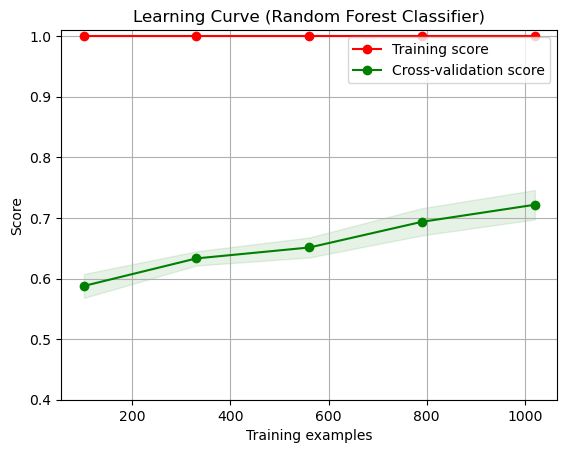

Mean cross-validation score: 0.716341911764706


In [18]:
#to see the performance of rondom forest model which is our best model we can use learning curves 

from sklearn.model_selection import learning_curve

rfc = RandomForestClassifier()

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Define the parameters for the learning curve plot
title = "Learning Curve (Random Forest Classifier)"
cv = 5
n_jobs = -1
ylim = (0.4, 1.01)

# Call the plot_learning_curve function and display the plot
plot_learning_curve(rfc, title, X_train, y_train, ylim=ylim, cv=cv, n_jobs=n_jobs)
plt.show()

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
predictions = rfc.predict(X_test)

print("Mean cross-validation score:", np.mean(cv_scores))



In [43]:
#Define the hyperparameters and their ranges to search over:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': ['None', 4, 6, 8],
    'min_samples_split': [2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', 'None'],
    'random_state': ['None', 42, 50],
    'min_samples_leaf' : [1, 3],


}

In [44]:
#Create a random forest classifier object:
rfc_1 = RandomForestClassifier()

In [45]:
#Create a grid search object using the defined hyperparameters and search strategy:
from sklearn.model_selection import GridSearchCV, train_test_split
grid_search = GridSearchCV(estimator=rfc_1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [46]:
#Fit the grid search object to the training data:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': ['None', 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2', 'None'],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 150],
                         'random_state': ['None', 42, 50]},
             verbose=2)

In [53]:
rfc_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
#Extract the best hyperparameters and evaluate the model on the test set:
best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print('Higher than 66 is expected')
print(f'Best parameters: {grid_search.best_params_}')
print(f'Test set accuracy: {accuracy:.5f}')

print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, y_pred, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

print(classification_report(y_test, y_pred, target_names=["low","medium", "high"]))


Higher than 66 is expected
Best parameters: {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 50}
Test set accuracy: 0.65517
Confusion matrix:


,low,medium,high
low,117,29,4
medium,41,78,10
high,0,26,14


              precision    recall  f1-score   support

         low       0.74      0.78      0.76       150
      medium       0.59      0.60      0.60       129
        high       0.50      0.35      0.41        40

    accuracy                           0.66       319
   macro avg       0.61      0.58      0.59       319
weighted avg       0.65      0.66      0.65       319



From above model we can see that the accuracy decreased after tuning the parameters, so we observe that the defult parameters are better.